In [58]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
filepath = '/Users/rphinney/Documents/Hollings/livneh_NAmerExt_15Oct2014_prmax1day_historical_1950_2013.nc'
data = Dataset(filepath)

In [72]:
print(data.variables.keys())

odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'prmax1day'])


In [73]:
print(data.variables['prmax1day'])

<class 'netCDF4._netCDF4.Variable'>
float32 prmax1day(time, lat, lon)
    _FillValue: 1e+20
    missing_value: 1e+20
    units: mm
    long_name: Annual maximum 1-day precipitation
unlimited dimensions: time
current shape = (64, 614, 928)
filling on


In [62]:
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
prcp = .003937*(data.variables['prmax1day'][:])

In [63]:
data.close()

In [64]:
from mpl_toolkits.basemap import Basemap

In [65]:
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width = 5000000, height = 3500000, resolution = 'l', projection = 'stere', lat_ts = 40, lat_0=lat_0, lon_0=lon_0)

In [66]:
lons,lats = np.meshgrid(lon,lat)
x,y = m(lons,lats)

/Users/rphinney/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rphinney/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


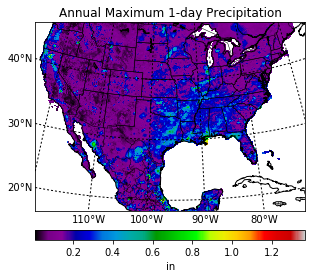

In [87]:
cs = m.pcolor(x,y, prcp[7][:][:], cmap = cm.spectral)

m.drawparallels(np.arange(-80.,81.,10.), labels = [1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 10.), labels = [0,0,0,1])

m.drawcoastlines()
m.drawstates()
m.drawcountries()

cbar = m.colorbar(cs, location = 'bottom', pad = "10%")
cbar.set_label('in')

plt.title('Annual Maximum 1-day Precipitation')
plt.show()